# Exploratory Data Analysis of Loan Prediction Data

#### Business Goal: To automate the loan eligibility process based on customer detail using previous data.
Dataset can be downloaded from my personal github repository: [mygitrepo](https://github.com/crosstrack10/data-science-projects/blob/main/datasets/loan_prediction_train.csv)

## Exploratory Analysis
The first that needs to be done before exploring the data is to import necessary packages and read in the dataset.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
# reading in dataset from github repository
url = "https://raw.githubusercontent.com/crosstrack10/data-science-projects/main/datasets/loan_prediction_train.csv"
loan_data = pd.read_csv(url)

Now, let's take a look at the structure of the data.

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# counting values by category for object data types
col_names = ["Gender", "Married", "Education", "Self_Employed", "Property_Area", "Loan_Status"] 

for col in col_names:
    current_col = loan_data[col].value_counts()
    print(current_col, "\n")

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



In [6]:
# retrieving general statistics for numerical variables
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


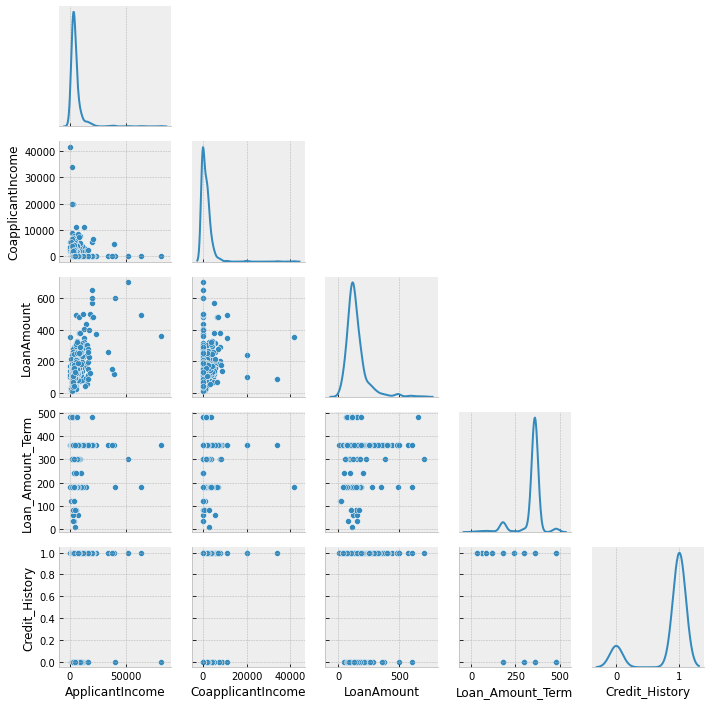

In [7]:
# Visualizing numerical variable distributions and multivariate relationships
plt.style.use("bmh")
g = sns.PairGrid(loan_data, diag_sharey = False, corner = True, height = 2)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
plt.show()

Most of the quantitative distributions are skewed. Credit history seems to be a bimodal distribution with two centers at 0 and 1.
It could be a binary classification that was imported as an integer. If so, it should be converted to a string class. 

In [8]:
# converting credit_history to string
loan_data["Credit_History"] = loan_data["Credit_History"].astype("str")
loan_data.Credit_History.dtype

dtype('O')

The loan amount values are stated in thousands. They should be converted regular numerical values.

In [9]:
# converting loan amounts to regular values
loan_data["LoanAmount"] = loan_data["LoanAmount"] * 1000
loan_data.LoanAmount.head()

0         NaN
1    128000.0
2     66000.0
3    120000.0
4    141000.0
Name: LoanAmount, dtype: float64

It might also be useful to use a logarithm in the numerical variables to see if linear relationships become more clear.

In [10]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
# custom function to avoid zero division
def ln_10(x):
    if np.issubdtype(x.dtype, np.number):
        return np.log10(x, where = (x != 0))
    else:
        return x

In [12]:
# apply custom log 10 function to dataframe
numeric_loan_data = loan_data.apply(ln_10)
numeric_loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,3.767082,6.918033e-310,NaN,2.556303,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,3.661150,3.178401e+00,5.107210,2.556303,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3.477121,2.404723e-316,4.819544,2.556303,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,3.412124,3.372544e+00,5.079181,2.556303,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,3.778151,6.000000e+03,5.149219,2.556303,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,3.462398,2.900000e+03,4.851258,2.556303,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,3.613419,4.106000e+03,4.602060,2.255273,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,3.906981,2.380211e+00,5.403121,2.556303,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,3.879841,7.583000e+03,5.271842,2.556303,1.0,Urban,Y


Strange, some previous 0 values now have very small values. Were they really zeros before or is it a method return error?

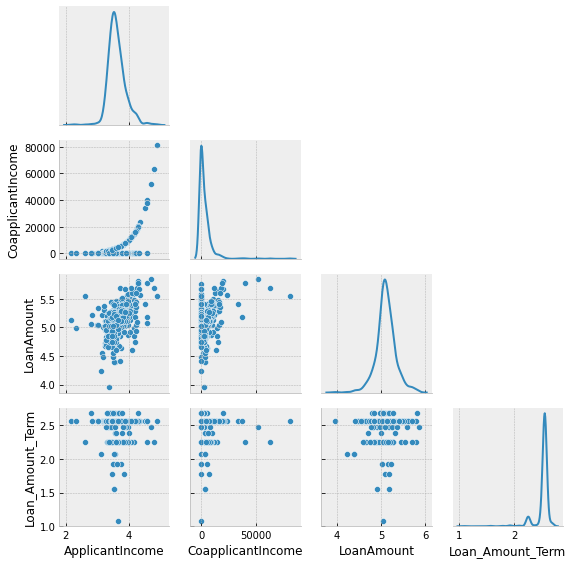

In [13]:
# Visualizing log numerical variable distributions and multivariate relationships
plt.style.use("bmh")
g = sns.PairGrid(numeric_loan_data, diag_sharey = False, corner = True, height = 2)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)
plt.show()

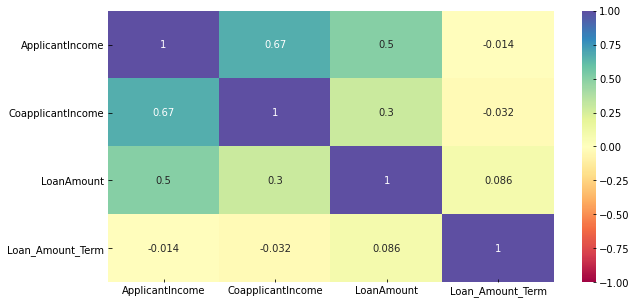

In [14]:
# Creating correlation matrix
corr_matrix = numeric_loan_data.corr()

# visualizing it
plt.figure(figsize = (10,5))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.show()

The LoanAmount and ApplicantIncome relationship is showing moderately strong positive linear correlation.
Copplicantincome and ApplicantIncome shows a stronger positive linear relationship.
There is also some positive linear correlation between LoanAmount and Coapplicantincome.

It could be interesting to combine ApplicantIncome and Coapplicantincome into a single variable later.